Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration"

Mounted at /content/gdrive
Test  Train


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,label_mode='categorical',seed=123,image_size=(img_height,img_width))

Found 2239 files belonging to 9 classes.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width), label_mode='categorical',seed=123,subset="validation",validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
classes = train_ds.class_names
print(classes)

##Storing the file paths for train dataset
file_paths = {c: [str(data_dir_train) + '/' + c + '/' + x for x in os.listdir(str(data_dir_train) + '/' + c)] for c in classes}

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

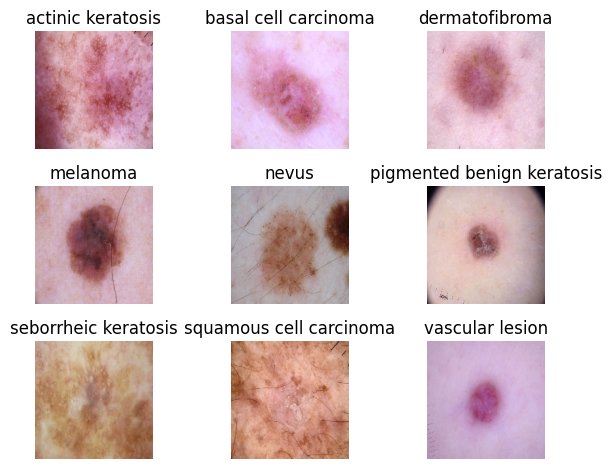

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

for i, c in enumerate(classes, start=1):
    path = file_paths[c][0]
    plt.subplot(3, 3, i)
    plt.imshow(load_img(path, target_size=(180, 180)))
    plt.title(c)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
### Visualizing stats for different class of skin cancer

In [ ]:
import os

def count_files_in_folders(directory):
    folder_counts=[]
    for folder_name in os.listdir(directory):
        folder_path=os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            # Count the no. of files in the current directory
            file_count=len(os.listdir(folder_path))
            folder_counts.append((folder_name, file_count))

    # Create df with class name and file counts
    df=pd.DataFrame(folder_counts, columns=['Class', 'Image Count'])
    return df

df = count_files_in_folders(data_dir_train)
print(df.sort_values(by='Image Count', ascending=False))


                        Class  Image Count
1  pigmented benign keratosis          462
4                    melanoma          438
7        basal cell carcinoma          376
6                       nevus          357
0     squamous cell carcinoma          181
8             vascular lesion          139
3           actinic keratosis          114
5              dermatofibroma           95
2        seborrheic keratosis           77


In [ ]:
data_dir_train

PosixPath('/content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [ ]:
!pip install Augmentor
##Importing augmentor library to generate more image files for training as there is class imbalance
import Augmentor

for i in classes:
    p = Augmentor.Pipeline(str(data_dir_train)+'/'+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)  #adding 500 samples to each class to balance the classes

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C202C7BB940>: 100%|██████████| 500/500 [00:30<00:00, 16.63 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C203C4E5900>: 100%|██████████| 500/500 [00:28<00:00, 17.66 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C202C783E50>: 100%|██████████| 500/500 [00:27<00:00, 18.07 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=3872x2592 at 0x7C203C4CF250>: 100%|██████████| 500/500 [01:53<00:00,  4.39 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7C2029621030>: 100%|██████████| 500/500 [02:11<00:00,  3.81 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C203C61BFD0>: 100%|██████████| 500/500 [00:27<00:00, 17.89 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C20411C3EE0>: 100%|██████████| 500/500 [01:00<00:00,  8.30 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C2029620BE0>: 100%|██████████| 500/500 [00:29<00:00, 17.11 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C202961BC40>: 100%|██████████| 500/500 [00:30<00:00, 16.16 Samples/s]


### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [14]:
classes = train_ds.class_names

In [13]:
train_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,label_mode='categorical',seed=123,subset="training",image_size=(img_height,img_width),validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [9]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=batch_size,image_size=(img_height,img_width), label_mode='categorical',seed=123,subset="validation",validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [26]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [41]:
### Printing stats after augmenting images for all the classes
import os

def count_files_in_folders(directory):
    folder_counts=[]
    for folder_name in os.listdir(directory):
        folder_path=os.path.join(directory, folder_name)
        if os.path.isdir(folder_path):
            # Count the no. of files in the current directory
            file_count=len(os.listdir(folder_path))
            folder_counts.append((folder_name, file_count))

    # Create df with class name and file counts
    df=pd.DataFrame(folder_counts, columns=['Class', 'Image Count'])
    return df

df = count_files_in_folders("/content/gdrive/My Drive/ai_workspace/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
print(df.sort_values(by='Image Count', ascending=False))


                        Class  Image Count
1  pigmented benign keratosis          463
4                    melanoma          439
7        basal cell carcinoma          377
6                       nevus          358
0     squamous cell carcinoma          182
8             vascular lesion          140
3           actinic keratosis          115
5              dermatofibroma           96
2        seborrheic keratosis           78


*We can clearly observe that **seborrheic keratosis** has the least samples=78, while **pigmented benign keratosis** has the most number of sample, this is a classical example of class imbalance, in later stage we will use Augumentor library to deal with this.*


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

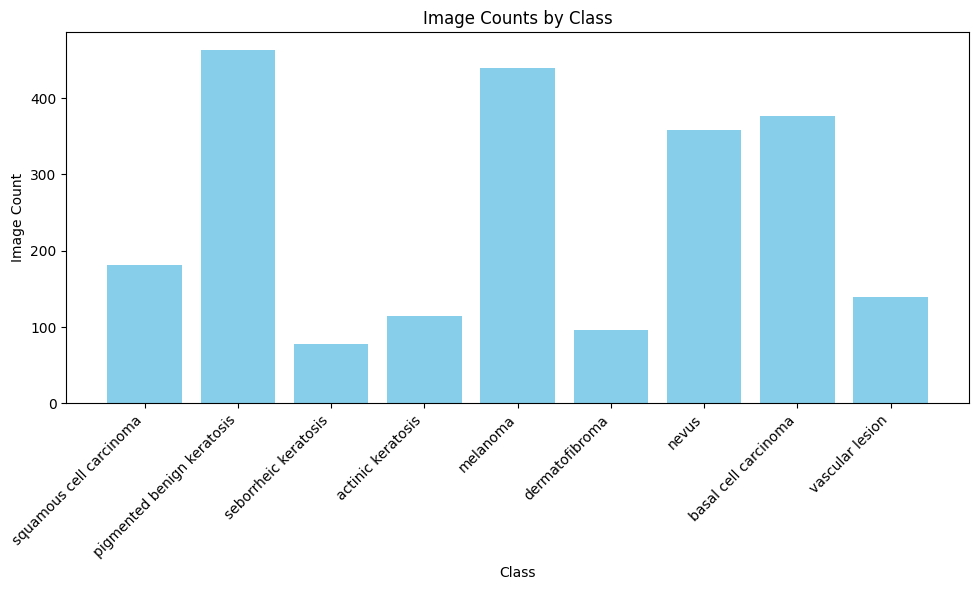

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df['Class'], df['Image Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Image Count')
plt.title('Image Counts by Class')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
#CNN Model
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
#Adding softmax activation function
model.add(layers.Dense(len(classes),activation='softmax'))


In [16]:
##Printing Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [17]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#Defining Early Stopping & checkpoinint
erlyStp=EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)
chck =ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 128)      

### Train the model

In [23]:
##Using GPU to enhance epoch performance and improvise learning rate and model training time
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth to avoid memory allocation issues
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Assuming you have a GPU available, you can proceed with training
# Define batch size
batch_size = 64

# Train the model with increased batch size
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    batch_size=batch_size,
    callbacks=[erlyStp, chck]
)

Physical devices cannot be modified after being initialized
Epoch 1/20
169/169 [==============================] - ETA: 0s - loss: 1.5997 - accuracy: 0.3906
Epoch 1: val_accuracy improved from -inf to 0.38530, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


169/169 [==============================] - 530s 3s/step - loss: 1.5997 - accuracy: 0.3906 - val_loss: 1.6087 - val_accuracy: 0.3853
Epoch 2/20
169/169 [==============================] - ETA: 0s - loss: 1.4185 - accuracy: 0.4622
Epoch 2: val_accuracy improved from 0.38530 to 0.50705, saving model to model.h5
169/169 [==============================] - 37s 204ms/step - loss: 1.4185 - accuracy: 0.4622 - val_loss: 1.3563 - val_accuracy: 0.5071
Epoch 3/20
168/169 [============================>.] - ETA: 0s - loss: 1.2864 - accuracy: 0.5203
Epoch 3: val_accuracy improved from 0.50705 to 0.51299, saving model to model.h5
169/169 [==============================] - 35s 197ms/step - loss: 1.2858 - accuracy: 0.5202 - val_loss: 1.2401 - val_accuracy: 0.5130
Epoch 4/20
169/169 [==============================] - ETA: 0s - loss: 1.1237 - accuracy: 0.5783
Epoch 4: val_accuracy improved from 0.51299 to 0.60505, saving model to model.h5
169/169 [==============================] - 34s 194ms/step - loss: 1.1

### Visualizing training results

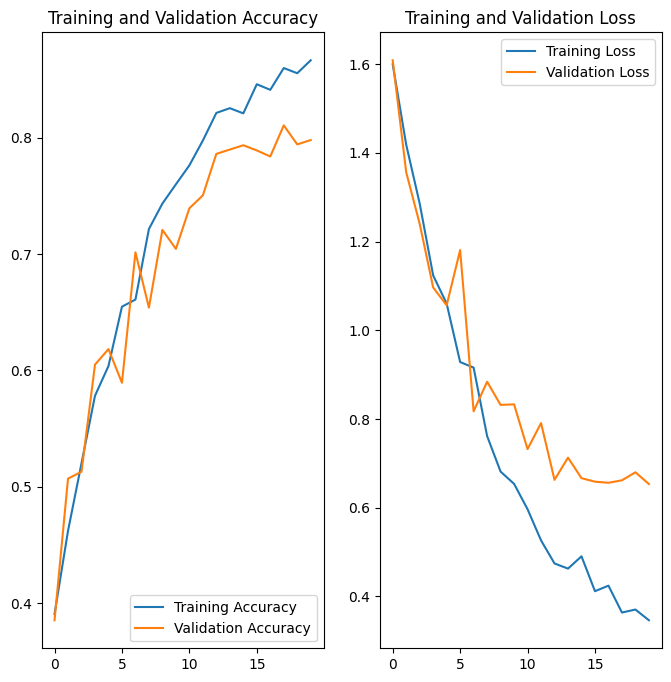

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###**Observations**
##### Augementing helped acheived better accuracy over train dataset.
##### It also helped manage the class imbalance issue.

In [63]:
## Testing sample images from test directory using the model and predicting the class

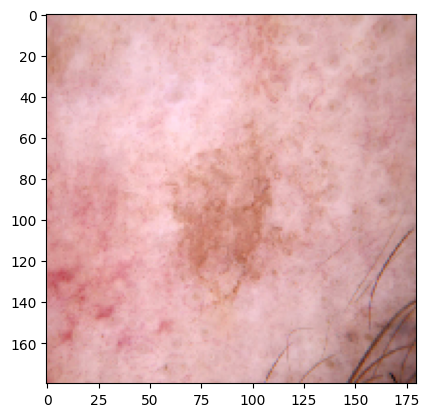

1/1 [==============================] - 0s 22ms/step
Actual Class: actinic keratosis
Predicted Class: nevus



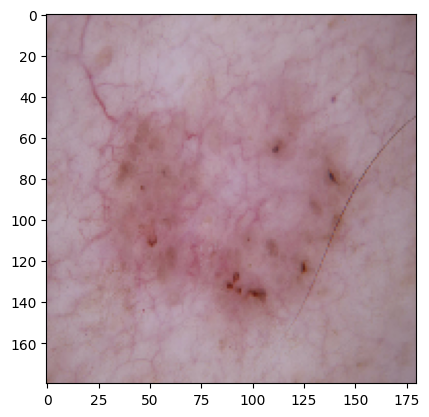

1/1 [==============================] - 0s 17ms/step
Actual Class: basal cell carcinoma
Predicted Class: squamous cell carcinoma



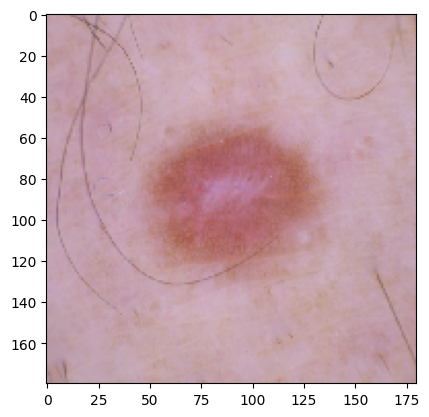

1/1 [==============================] - 0s 17ms/step
Actual Class: dermatofibroma
Predicted Class: dermatofibroma



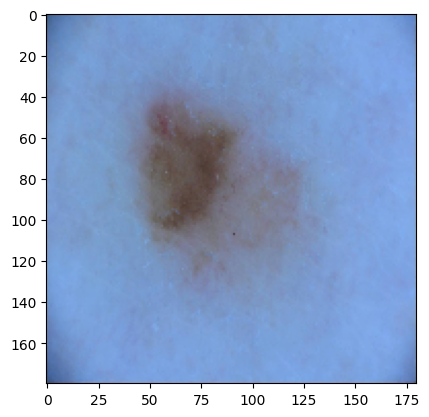

1/1 [==============================] - 0s 18ms/step
Actual Class: melanoma
Predicted Class: nevus



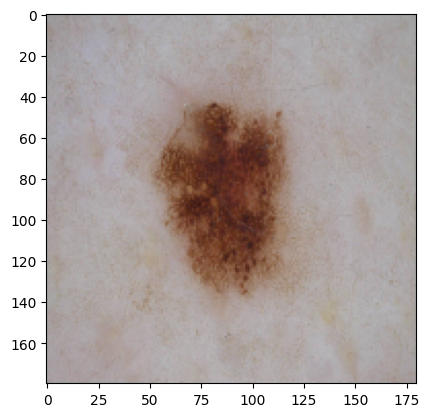

1/1 [==============================] - 0s 33ms/step
Actual Class: nevus
Predicted Class: nevus



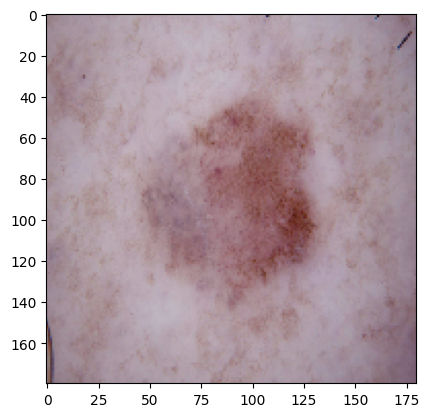

1/1 [==============================] - 0s 35ms/step
Actual Class: pigmented benign keratosis
Predicted Class: pigmented benign keratosis



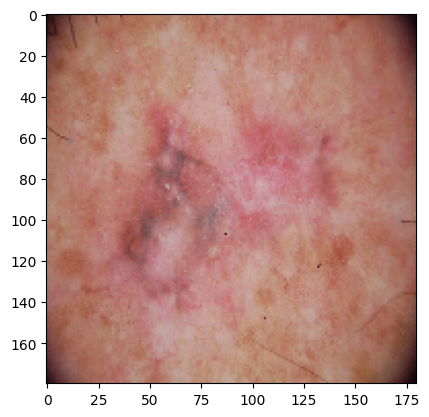

1/1 [==============================] - 0s 25ms/step
Actual Class: seborrheic keratosis
Predicted Class: melanoma



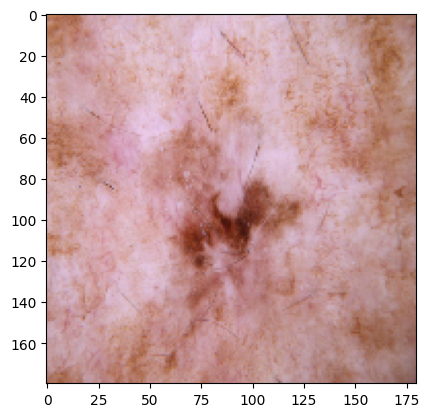

1/1 [==============================] - 0s 41ms/step
Actual Class: squamous cell carcinoma
Predicted Class: squamous cell carcinoma



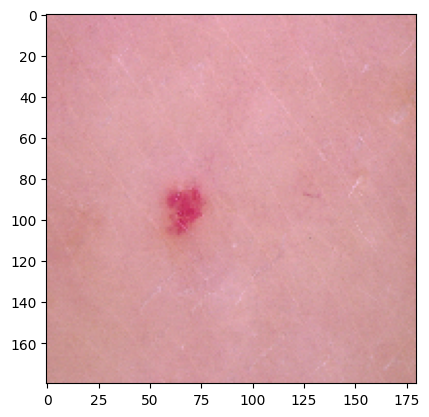

1/1 [==============================] - 0s 60ms/step
Actual Class: vascular lesion
Predicted Class: basal cell carcinoma



In [57]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import os

# Iterate over each class
for class_name in classes:
    test_image_path = os.path.join(data_dir_test, class_name, '*')
    test_image_files = glob(test_image_path)
    sample_image_path = test_image_files[-1]

    # Load image and resize it
    test_image = load_img(sample_image_path, target_size=(180, 180, 3))
    plt.imshow(test_image)
    plt.grid(False)
    plt.show()
    img = np.expand_dims(test_image, axis=0)

    pred = model.predict(img)
    pred_index = np.argmax(pred)
    pred_class = classes[pred_index]

    #Print the actual and predicted class name
    print("Actual Class: " + class_name)
    print("Predicted Class: " + pred_class)
    print()

**We can observe the classes are getting properly recognized from the sample of 10 images elected for the 9 classes**

In [66]:
val_accuracy = history.history['val_accuracy']

# Printing final validation accuracy over Training datset
print("Final Validation Accuracy of Training dataset:", val_accuracy[-1])

Final Validation Accuracy of Training dataset: 0.7980697751045227


In [67]:
# Evaluating model over validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

43/43 [==============================] - 1s 16ms/step - loss: 0.6535 - accuracy: 0.7981
Validation Loss: 0.6534829139709473
Validation Accuracy: 0.7980697751045227


In [69]:
##Creating test dataset
test_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,batch_size=batch_size,image_size=(img_height,img_width), label_mode='categorical',seed=123)

Found 118 files belonging to 9 classes.


In [70]:
# Evaluating model over test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 6s 569ms/step - loss: 6.2157 - accuracy: 0.3644
Test Loss: 6.21568489074707
Test Accuracy: 0.3644067943096161


In [77]:
##Retraining the model with 50Epochs to see any improvement in Accuracy

In [71]:
##Using GPU to enhance epoch performance and improvise learning rate and model training time
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Enable memory growth to avoid memory allocation issues
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Assuming you have a GPU available, you can proceed with training
# Define batch size
batch_size = 64

# Train the model with increased batch size
history2 = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=batch_size,
    callbacks=[erlyStp, chck]
)

Physical devices cannot be modified after being initialized
Epoch 1/50
169/169 [==============================] - ETA: 0s - loss: 0.3616 - accuracy: 0.8648
Epoch 1: val_accuracy did not improve from 0.81069
169/169 [==============================] - 34s 193ms/step - loss: 0.3616 - accuracy: 0.8648 - val_loss: 0.7425 - val_accuracy: 0.7958
Epoch 2/50
169/169 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.8806
Epoch 2: val_accuracy did not improve from 0.81069
169/169 [==============================] - 36s 203ms/step - loss: 0.3193 - accuracy: 0.8806 - val_loss: 0.8210 - val_accuracy: 0.7758
Epoch 3/50
169/169 [==============================] - ETA: 0s - loss: 0.3193 - accuracy: 0.8769
Epoch 3: val_accuracy improved from 0.81069 to 0.82183, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


169/169 [==============================] - 38s 216ms/step - loss: 0.3193 - accuracy: 0.8769 - val_loss: 0.6810 - val_accuracy: 0.8218
Epoch 4/50
168/169 [============================>.] - ETA: 0s - loss: 0.2919 - accuracy: 0.8876
Epoch 4: val_accuracy improved from 0.82183 to 0.82331, saving model to model.h5
169/169 [==============================] - 36s 202ms/step - loss: 0.2912 - accuracy: 0.8880 - val_loss: 0.6896 - val_accuracy: 0.8233
Epoch 5/50
168/169 [============================>.] - ETA: 0s - loss: 0.2920 - accuracy: 0.8914
Epoch 5: val_accuracy did not improve from 0.82331
169/169 [==============================] - 36s 202ms/step - loss: 0.2925 - accuracy: 0.8913 - val_loss: 0.8161 - val_accuracy: 0.8114
Epoch 6/50
168/169 [============================>.] - ETA: 0s - loss: 0.3207 - accuracy: 0.8770
Epoch 6: val_accuracy did not improve from 0.82331
169/169 [==============================] - 37s 208ms/step - loss: 0.3210 - accuracy: 0.8767 - val_loss: 0.7311 - val_accuracy: 

In [73]:
val_accuracy = history.history['val_accuracy']

# Printing final validation accuracy over Training datset
print("Final Validation Accuracy of Training dataset:", val_accuracy[-1])

Final Validation Accuracy of Training dataset: 0.7980697751045227


In [74]:
# Evaluating model over validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

43/43 [==============================] - 1s 13ms/step - loss: 0.7883 - accuracy: 0.8248
Validation Loss: 0.7882665395736694
Validation Accuracy: 0.8247958421707153
